#**DECISION TREE**

##**THEORITICAL:**

### 1. **What is a Decision Tree, and how does it work?**

A **Decision Tree** is a supervised machine learning algorithm used for classification and regression tasks. It works by recursively splitting the dataset into subsets based on feature values, forming a tree structure where each internal node represents a test on a feature, each branch represents an outcome of the test, and each leaf node represents a predicted label or value.

---

### 2. **What are impurity measures in Decision Trees?**

**Impurity measures** evaluate how mixed the classes are in a node. They help the tree decide where to split the data. Common impurity measures include:

* **Gini Impurity**
* **Entropy (Information Gain)**
* **Mean Squared Error (for regression)**

---

### 3. **What is the mathematical formula for Gini Impurity?**

$$
Gini(t) = 1 - \sum_{i=1}^{n} p_i^2
$$

Where:

* $p_i$ = probability of class $i$ at node $t$
* $n$ = total number of classes

---

### 4. **What is the mathematical formula for Entropy?**

$$
Entropy(t) = - \sum_{i=1}^{n} p_i \log_2(p_i)
$$

Where:

* $p_i$ = probability of class $i$ at node $t$
* $n$ = number of classes

---

### 5. **What is Information Gain, and how is it used in Decision Trees?**

**Information Gain (IG)** measures the reduction in entropy or impurity after a dataset is split on a feature.

$$
IG(D, A) = Entropy(D) - \sum_{v \in Values(A)} \frac{|D_v|}{|D|} \cdot Entropy(D_v)
$$

Where:

* $D$ = dataset
* $A$ = attribute
* $D_v$ = subset of $D$ with attribute $A = v$

Used to select the feature that provides the highest gain at each step.

---

### 6. **What is the difference between Gini Impurity and Entropy?**

| Criteria   | Gini Impurity                     | Entropy                         |
| ---------- | --------------------------------- | ------------------------------- |
| Formula    | $1 - \sum p_i^2$                  | $-\sum p_i \log_2(p_i)$         |
| Range      | \[0, 0.5] (binary classification) | \[0, 1]                         |
| Speed      | Faster                            | Slower (due to log computation) |
| Preference | CART uses Gini                    | ID3/C4.5 use Entropy            |

---

### 7. **What is the mathematical explanation behind Decision Trees?**

Decision Trees build a model $f(X) \to Y$ by minimizing a cost function such as:

* **Classification**: Minimize impurity (Gini or Entropy)
* **Regression**: Minimize squared error

At each split, it chooses the feature $j$ and threshold $t$ that maximizes information gain or minimizes cost:

$$
\text{Best split} = \arg\min_{j,t} \left[ L(left) + L(right) \right]
$$

Where $L$ is a loss function over the left and right partitions.

---

### 8. **What is Pre-Pruning in Decision Trees?**

**Pre-pruning** (early stopping) limits the tree growth during construction using conditions like:

* Max depth
* Min samples per node
* Min information gain

Helps avoid overfitting by halting growth early.

---

### 9. **What is Post-Pruning in Decision Trees?**

**Post-pruning** trims a fully grown tree by removing branches that do not contribute to predictive power, based on validation set performance or complexity cost pruning (e.g., minimal cost-complexity pruning in CART).

---

### 10. **What is the difference between Pre-Pruning and Post-Pruning?**

| Feature   | Pre-Pruning              | Post-Pruning                       |
| --------- | ------------------------ | ---------------------------------- |
| When      | During tree construction | After full tree is built           |
| Technique | Stops growth early       | Trims back the grown tree          |
| Risk      | Underfitting             | Generally safer, less underfitting |

---

### 11. **What is a Decision Tree Regressor?**

A **Decision Tree Regressor** predicts continuous values instead of class labels. It splits data to minimize the variance (or MSE) within the target values at each node.

Loss function typically:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y})^2
$$

---

### 12. **What are the advantages and disadvantages of Decision Trees?**

**Advantages:**

* Easy to interpret and visualize
* Handles both numerical and categorical data
* Requires little preprocessing

**Disadvantages:**

* Prone to overfitting
* Sensitive to small data changes
* Can create biased trees with unbalanced data

---

### 13. **How does a Decision Tree handle missing values?**

Common strategies:

* **Imputation** (mean/median/mode or model-based)
* **Surrogate splits** (use backup features when primary split is missing)
* **Ignore missing samples** during split decisions

---

### 14. **How does a Decision Tree handle categorical features?**

Approaches:

* **One-hot encoding** (common for scikit-learn)
* **Label encoding**
* Some libraries (e.g., XGBoost, CatBoost) handle them natively

During splitting, it finds the best way to group categories to minimize impurity.

---

### 15. **What are some real-world applications of Decision Trees?**

* **Medical Diagnosis** (e.g., disease prediction)
* **Credit Scoring** and **Loan Approval**
* **Marketing** (e.g., churn prediction, segmentation)
* **Fraud Detection**
* **Customer Support** (decision-based troubleshooting)
* **Agriculture** (crop disease prediction)



##**PRACTICAL:**

###**16. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy**

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Q16 Accuracy:", accuracy_score(y_test, y_pred))



Q16 Accuracy: 1.0


###**17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances.**

In [3]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

print("Q17 Feature Importances (Gini):", clf_gini.feature_importances_)


Q17 Feature Importances (Gini): [0.         0.01911002 0.89326355 0.08762643]


##**18. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy**

In [4]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

y_pred_entropy = clf_entropy.predict(X_test)
print("Q18 Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))


Q18 Accuracy (Entropy): 0.9777777777777777


##**19. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE).**

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X_h, y_h = housing.data, housing.target

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h, y_h, test_size=0.3, random_state=42)

reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train_h, y_train_h)

y_pred_h = reg.predict(X_test_h)
print("Q19 MSE:", mean_squared_error(y_test_h, y_pred_h))


Q19 MSE: 0.5280096503174904


###**20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz.**

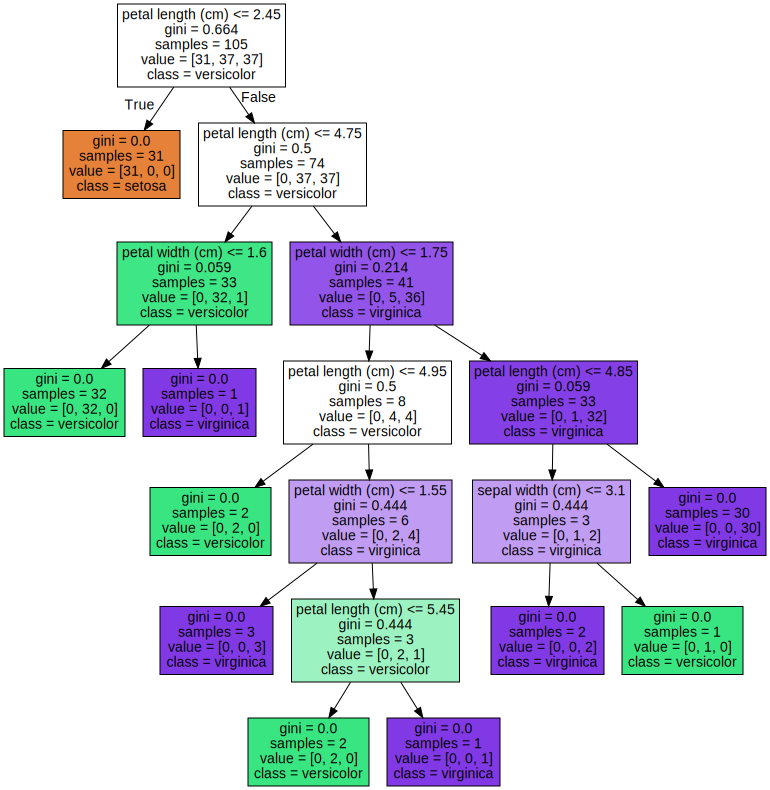

In [6]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
graph = graphviz.Source(dot_data)
graph.render("iris_tree")
graph


###**21. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree**

In [7]:
clf_full = DecisionTreeClassifier(random_state=42)
clf_limited = DecisionTreeClassifier(max_depth=3, random_state=42)

clf_full.fit(X_train, y_train)
clf_limited.fit(X_train, y_train)

print("Q21 Full Tree Accuracy:", accuracy_score(y_test, clf_full.predict(X_test)))
print("Q21 Max Depth=3 Accuracy:", accuracy_score(y_test, clf_limited.predict(X_test)))


Q21 Full Tree Accuracy: 1.0
Q21 Max Depth=3 Accuracy: 1.0


###**22. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree**

In [8]:
clf_default = DecisionTreeClassifier(random_state=42)
clf_split5 = DecisionTreeClassifier(min_samples_split=5, random_state=42)

clf_default.fit(X_train, y_train)
clf_split5.fit(X_train, y_train)

print("Q22 Default Accuracy:", accuracy_score(y_test, clf_default.predict(X_test)))
print("Q22 min_samples_split=5 Accuracy:", accuracy_score(y_test, clf_split5.predict(X_test)))


Q22 Default Accuracy: 1.0
Q22 min_samples_split=5 Accuracy: 1.0


##**23. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

clf_scaled = DecisionTreeClassifier(random_state=42).fit(X_train_s, y_train_s)
clf_unscaled = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

print("Q23 Scaled Accuracy:", accuracy_score(y_test_s, clf_scaled.predict(X_test_s)))
print("Q23 Unscaled Accuracy:", accuracy_score(y_test, clf_unscaled.predict(X_test)))


###**24. **Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification**

In [9]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr.fit(X_train, y_train)

print("Q24 OvR Accuracy:", accuracy_score(y_test, ovr.predict(X_test)))


Q24 OvR Accuracy: 1.0


###**25. Write a Python program to train a Decision Tree Classifier and display the feature importance scores**

In [10]:
clf_fi = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print("Q25 Feature Importances:", clf_fi.feature_importances_)


Q25 Feature Importances: [0.         0.01911002 0.89326355 0.08762643]


##**26. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree**

In [11]:
reg_full = DecisionTreeRegressor(random_state=42)
reg_limited = DecisionTreeRegressor(max_depth=5, random_state=42)

reg_full.fit(X_train_h, y_train_h)
reg_limited.fit(X_train_h, y_train_h)

print("Q26 MSE (Full):", mean_squared_error(y_test_h, reg_full.predict(X_test_h)))
print("Q26 MSE (Max Depth=5):", mean_squared_error(y_test_h, reg_limited.predict(X_test_h)))


Q26 MSE (Full): 0.5280096503174904
Q26 MSE (Max Depth=5): 0.5210801561811793


###**27. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy***

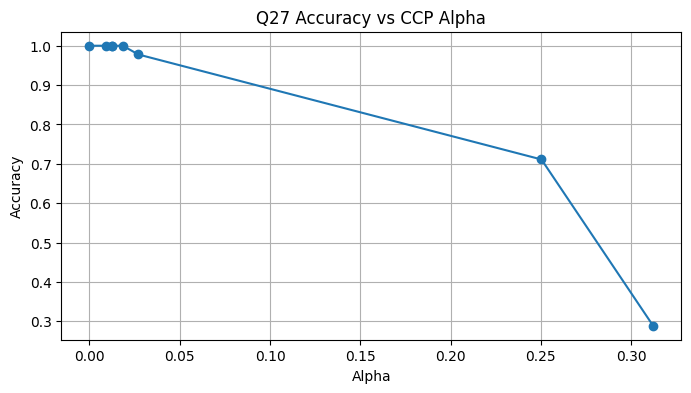

In [12]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = [DecisionTreeClassifier(random_state=42, ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]
accs = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(ccp_alphas, accs, marker='o')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Q27 Accuracy vs CCP Alpha")
plt.grid(True)
plt.show()


###**28. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score**

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_28 = clf.predict(X_test)

print("Q28 Precision (Macro):", precision_score(y_test, y_pred_28, average='macro'))
print("Q28 Recall (Macro):", recall_score(y_test, y_pred_28, average='macro'))
print("Q28 F1 Score (Macro):", f1_score(y_test, y_pred_28, average='macro'))


Q28 Precision (Macro): 1.0
Q28 Recall (Macro): 1.0
Q28 F1 Score (Macro): 1.0


##**29. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn**

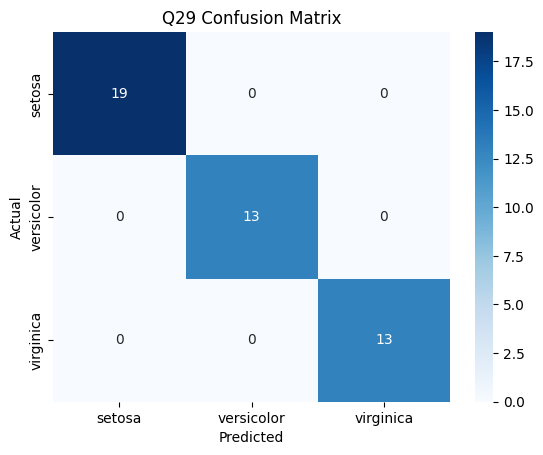

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_pred_28)

sns.heatmap(conf, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Q29 Confusion Matrix")
plt.show()


###**30. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal valuesfor max_depth and min_samples_split.**

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3)
grid.fit(X_train, y_train)

print("Q30 Best Parameters:", grid.best_params_)
print("Q30 Best Cross-Validation Score:", grid.best_score_)


Q30 Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Q30 Best Cross-Validation Score: 0.9238095238095237
